[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W7/W7P2.ipynb)



In [1]:
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

In [2]:
def to_dataframe(text: str):
    """
    
    Parameters
    ----------
    text : this dude is a text file (a string actually).

    Returns
    -------
    Pandas dataframe

    """    
    L = []
    headers = []
    with open(text) as file:
        T = file.readlines()
        for i, t in enumerate(T):
            if i == 0:
                for header  in t[:-1].split():
                  headers.append(header)      
            else:
                L.append(t[0:-1].split())
    L = pd.DataFrame(L)
    
    L = L.apply(pd.to_numeric)
    L.columns = headers
    return L
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
  !unzip "/content/ch2data.zip" -d "/content/ch2data/"
  if not os.getcwd() == '/content/ch2data':
    os.chdir("ch2data")
  else:
    print(f"Current directory is now {os.getcwd()}")

download_data()

--2022-10-15 15:59:57--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch2data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 557379 (544K) [application/x-zip-compressed]
Saving to: ‘ch2data.zip’

ch2data.zip         100%[===================>] 544.32K   645KB/s    in 0.8s    

2022-10-15 15:59:58 (645 KB/s) - ‘ch2data.zip’ saved [557379/557379]

Archive:  /content/ch2data.zip
  inflating: /content/ch2data/d-aapl0305.txt  
  inflating: /content/ch2data/d-ibm3dx7008.txt  
  inflating: /content/ch2data/d-sp55008.txt  
  inflating: /content/ch2data/d-vix0810.txt  
  inflating: /content/ch2data/m-3m4608.txt  
  inflating: /content/ch2data/m-aaa-1911.txt  
  inflating: /content/ch2data/m-baa-1911.txt  
  inflating: /content/ch2data/m-dec125910-6111.txt  
  inflating: /c

In [3]:
data = to_dataframe("q-ko-earns8309.txt")
print(data)

        pends   anntime   value
0    19830331  19830426  0.0375
1    19830630  19830725  0.0492
2    19830930  19831102  0.0463
3    19831231  19840214  0.0379
4    19840331  19840419  0.0425
..        ...       ...     ...
102  20080930  20081015  0.8300
103  20081231  20090212  0.6400
104  20090331  20090421  0.6500
105  20090630  20090721  0.9200
106  20090930  20091020  0.8200

[107 rows x 3 columns]


In [4]:
data = data["value"]

In [5]:
data_ = data.apply(np.log)


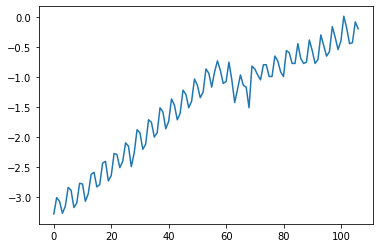

In [6]:
plt.plot(data_)

#What we will be doing below will be covered later on! Now giving it for the sake of brevity.

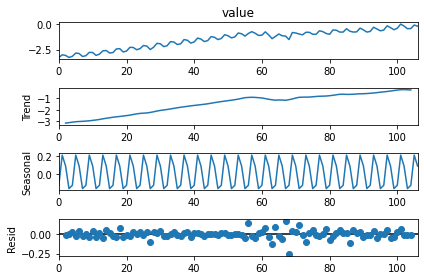

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_, model='additive', period = 4)  ### experiment here with a couple of periods.
result.plot()
plt.show()

For information about Seasonal models click here [HERE!](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) 

In [8]:
import statsmodels
from statsmodels import tsa
from statsmodels.tsa.arima.model import ARIMA

In [9]:
mod = ARIMA(data_,  order = (0,1,1), seasonal_order = (0,1,1,4))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                           value   No. Observations:                  107
Model:             ARIMA(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                 104.252
Date:                         Sat, 15 Oct 2022   AIC                           -202.503
Time:                                 16:00:00   BIC                           -194.628
Sample:                                      0   HQIC                          -199.315
                                         - 107                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4096      0.058     -7.104      0.000      -0.523      -0.297
ma.S.L4       -0.8202      0.062    -13.224      0.000      -0.942      -0.699
sigma2         0.0072      0.001     12.597      0.000       0.006       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                99.44
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                            -0.98
Prob(H) (two-sided):                  0.06   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

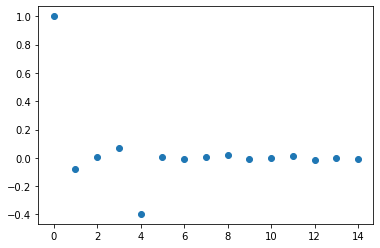

In [10]:
residuals = res.resid
from statsmodels.tsa.stattools import acf
y = acf(residuals, nlags = 14, fft = True)
X = list(range(len(y)))
plt.scatter(X,y)

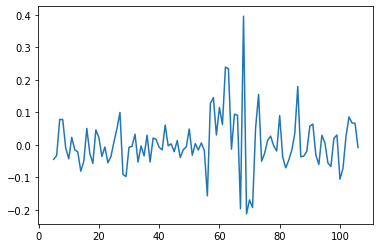

In [11]:
plt.plot(res.predict()[5:] - data_[5:])

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(res.resid[5:], return_df = True, lags = 20, model_df = 2)  ### you see you do not have any huge correlation between correlaitons this can bee seen from 

,lb_stat,lb_pvalue
1,0.005774,NaN
2,0.103220,NaN
3,0.103269,0.747941
4,0.317047,0.853403
5,5.653312,0.129751
6,6.148073,0.188360
7,8.936317,0.111631
8,8.953849,0.176190
9,11.893118,0.104129
10,11.992718,0.151529


##Let's do some forecast

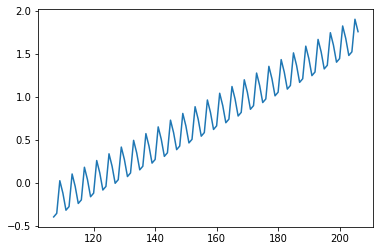

In [13]:
plt.plot(res.forecast(100)) 